<a href="https://colab.research.google.com/github/TirendazAcademy/Deep-Learning-with-TensorFlow/blob/main/TFDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
mnist_data = tfds.load("fashion_mnist")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4KF9FH/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete4KF9FH/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
for item in mnist_data:
  print(item)

train
test


In [ ]:
mnist_train = tfds.load("fashion_mnist", split="train")

In [ ]:
isinstance(mnist_train, tf.data.Dataset)

True

In [ ]:
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
for item in mnist_train.take(1):
  print(type(item))
  print(item.keys())

<class 'dict'>
dict_keys(['image', 'label'])


In [ ]:
for item in mnist_train.take(1):
  print(item["image"].shape)
  print(item["label"].shape)

(28, 28, 1)
()


In [ ]:
mnist_test, info = tfds.load("fashion_mnist",with_info=True)

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

In [ ]:
mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
ds = tfds.load("fashion_mnist", split="train", 
               as_supervised=True)

In [ ]:
ds = ds.take(1)
for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 2


TFDS => (28,28,1) 
Keras => (28,28) 
input_shape=(28,28,1)

In [ ]:
image , label = tfds.as_numpy(
    tfds.load(
        "fashion_mnist",
        split= "test",
        batch_size = -1,
        as_supervised=True
    )
)

In [ ]:
print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


In [ ]:
ds, info = tfds.load("fashion_mnist", split="train", with_info=True)

In [ ]:
tfds.as_dataframe(ds.take(4),info)

,image,label
0,,2 (Pullover)
1,,1 (Trouser)
2,,8 (Bag)
3,,4 (Coat)


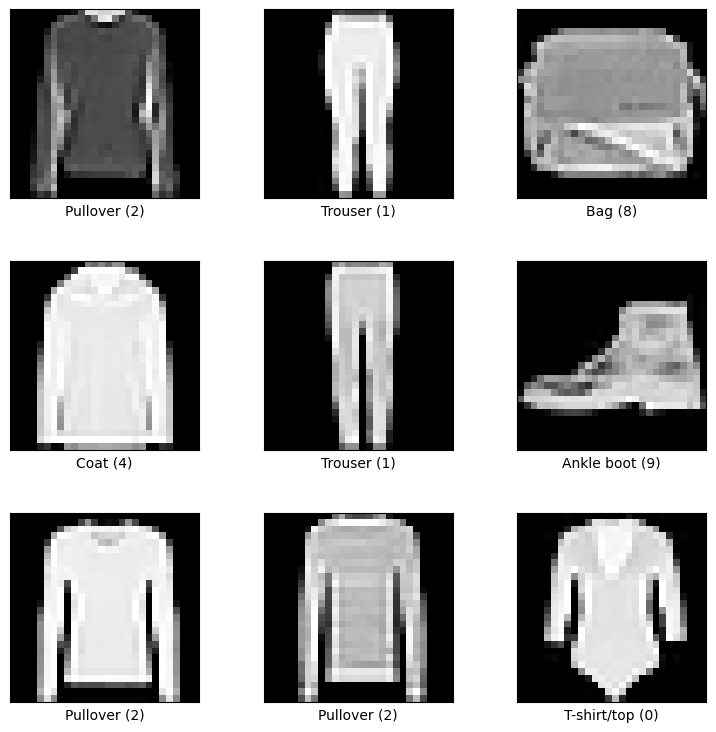

In [ ]:
fig= tfds.show_examples(ds, info)

In [ ]:
data = tfds.load("cats_vs_dogs", as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteU2G3S5/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
for item in data:
  print(item)

train


In [ ]:
data = tfds.load("cats_vs_dogs", split="train[:10000]", as_supervised=True)

In [ ]:
train_data = tfds.load("cats_vs_dogs", 
                       split="train[:80%]", as_supervised=True)
val_data = tfds.load("cats_vs_dogs", 
                       split="train[80%:90%]", as_supervised=True)
test_data = tfds.load("cats_vs_dogs", 
                       split="train[-10%:]", as_supervised=True)